[![Open In
Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap4/13-Estimation-MLE.ipynb)


# <a name="13intro">4.1: Maximum Likelihood Estimation</a>

---

<figure>
<img
src="https://creazilla-store.fra1.digitaloceanspaces.com/cliparts/60165/arrows-in-the-target-clipart-md.png"
alt="Arrows Hitting a Target" width = "30%"/>
<figcaption aria-hidden="true">
Credit: <a href="https://creazilla.com/nodes/60165-arrows-in-the-target-clipart">Arrows in the target</a>, Public Domain
</figcaption>
</figure> 


In Chapter 3, we explored properties of sample statistics picked from a
population with a known distribution.

-   We analyzed the [distribution of sample means](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap3/10-Sampling-Dist-Mean.ipynb) picked from normal and exponential   distributions.
-   We analyzed the [distribution of sample proportions](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap3/11-Sampling-Dist-Prop.ipynb) independently pick from a binomial population.
-   Sampling distributions allowed us to predict how likely we are to pick certain sample statistics when the population is fixed and known.

However, statistical inference is applied in situations where <font color="dodgerblue">**properties of the populations are
unknown**</font>. A typical workflow for statistical inference is:

1.  Pick one (not thousands) random sample from a population with   unknown characteristics.
2.  Calculate sample statistic(s) to describe the sample.
3.  Based on the characteristics of the sample, make   predictions/estimates for the unknown population characteristics.

In this chapter, we explore two powerful estimation techniques, maximum
likelihood estimation and the method of moments. We will investigate how
well our estimators perform using general properties of estimators such
as bias, efficiency, and mean square error.



# <a name="13slot">Case Study: Slot Machine Jackpots</a>

---

<figure>
<img
src="https://cdn.pixabay.com/photo/2018/06/22/17/54/casino-3491252_1280.jpg"
alt="Slot Machines" width = "50%"/>
<figcaption aria-hidden="true">
Credit: <a href="https://pixabay.com/photos/casino-game-room-slot-machines-3491252/">Casino Game Room Slot Machines</a>, <a href="https://cdn.pixabay.com/photo/2018/06/22/17/54/casino-3491252_1280.jpg">Open License</a> by <a href="https://pixabay.com/users/bru-no-1161770/">[Brun-nO]</a>
</figcaption>
</figure> 


A strategic gambler believes they have identified a faulty slot machine which pays out significantly more money than the other slot machines. She and her friends watch the machine 24 hours a day for 7 days and observed the slot machine paid out the \$$1,\!000,\!000$ jackpot prize 10 times during the week. How can she figure out whether the machine is faulty or whether the number of jackpot prizes are within reason?



## <a name="13q1">Question 1</a>

---

They decide to compare the performance of the suspect slot machine to other slot machines. They pick a random sample of $n=4$ other slot machines and record how many jackpot prizes each machine pays over a one week time frame. Let random variable $X$ denote the number of jackpots a randomly selected slot machine pays out in week. What distribution do you think best models $X$? Give a corresponding formula for the probability mass function of $X$.

-   *Hint: Should we use a discrete or continuous random variable?*
-   *Hint: See either [appendix of common discrete random   variables](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap2/07-Common-Discrete-RandVar.ipynb) or [appendix   of common continuous random   variables](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap2/08-Common-Continuous-Distributions.ipynb) for   additional help.*

### <a name="13sol1">Solution to Question 1</a>

---

<br>  
<br>  
<br>



## <a name="13collect">Collecting Data</a>

---

We will simulate collecting a data sample.

-   Run the code cell below to “secretly” generate a population mean that we store in `true.mean`.
-   The command `set.seed(827)` will seed the randomization so we all have the same population mean.
-   Do not print the output to screen. Keep `true.mean` secret for now!

In [38]:
# set randomization for seeding population mean
set.seed(827)  

# pick a population mean that will be fixed but unknown to us
true.mean <- sample(3:8, size=1)

Next, we generate a sample size $n=4$.

-   Run the code cell below to generate your random sample.
-   Each observation $x_i$ in the vector `x` corresponds to the number of jackpots a randomly selected slot machine paid out in one week.
-   The command `set.seed(612)` will seed the randomization so my sample `x` remains fixed. -   You can delete the command `set.seed(612)` to generate a different random sample picked from the same population. -   Then you can compare the estimate obtained from your sample with the estimate based on the sample generated below.
-   Inspect the values in your sample after running.

In [39]:
set.seed(612)

x <- rpois(4, true.mean)
x

[1] 9 8 6 5

-   The sample generated by `set.seed(612)` is

$$x_1=9 \ ,\  x_2=8\ ,\  x_3=6 \ , \ x_4=5.$$



## <a name="13q2">Question 2</a>

---

Using the probability mass function from [Question 1](#13q1) and your sample generated by the code cell above stored in `x`, what is the probability of picking the random sample $x_1$, $x_2$, $x_3$, $x_4$ stored in `x`?
Your answer will be a formula that depends on the parameter $\lambda$.

### <a name="13sol2">Solution to Question 2</a>

---

<br>  
<br>  
<br>  



# <a name="13like-intro">What Is the Probability of Picking Our Random Sample?</a>

---

We motivate maximum likelihood estimation with the following question:

> <font color="dodgerblue">What is the most likely value for the unknown parameter $\theta$ given we know a random sample of values $x_1, x_2, \ldots x_n$?</font>

The <font color="dodgerblue">**likelihood function**</font>
$$\color{dodgerblue}{L(\theta)= L( \theta \mid x_1, x_2, \ldots x_n)}$$ gives the likelihood of the parameter $\theta$ given the observed sample data. A <font color="dodgerblue">**maximum likelihood estimate (MLE)**</font>, denoted
$\color{dodgerblue}{\mathbf{\hat{\theta}_{\rm MLE}}}$, is the value of $\theta$ that gives the maximum value of the likelihood function $L(\theta)$.

<br>

### <font color="mediumseagreen">A Note About Notation<font color="dodgerblue">

---

In statistics, we typically <font color="mediumseagreen">**use Greek letters to denote population parameters**</font>, and <font color="mediumseagreen">**we use “hat" notation to indicate an estimator**</font> for the value of a population parameter.

-   <font color="mediumseagreen">*The notation $\theta$ is the generic notation typically used to represent a parameter.*</font>
-   <font color="mediumseagreen">*The notation $\hat{\theta}$ denotes an estimator for $\theta$.*</font>



## <a name="13q3">Question 3</a>

---

Find the value of $\lambda$ that maximizes the likelihood function from
[Question 2](#13q2).


<font color="mediumseagreen">*Hint: Recall from calculus that global maxima occur at end points or critical points where $\frac{d L}{d \lambda} = 0$ or is undefined.*</font>

### <a name="13sol3">Solution to Question 3</a>

---

<br>  
<br>  
<br>



### <a name="13plot-pois">Plotting the Likelihood Function for Question 3</a>

---

Given the random sample $x_1=9, x_2=8, x_3=6, x_4=5$, the resulting likelihood derived in [Question 2](#13q2) is

$$L({\color{tomato}\lambda}) = \frac{{\color{tomato}\lambda}^{28} e^{-4{\color{tomato}\lambda}}}{(9!)(8!)(6!)(5!)}.$$

In [Question 3](#13q3), we find the value of $\lambda$ that maximizes the likelihood function $L(\lambda)$ using optimization methods from calculus. It is always a good idea to check our work. If we have access to technology, we can plot the likelihood function and identify the approximate value of $\lambda$ that gives the maximum value of
$L(\lambda)$.

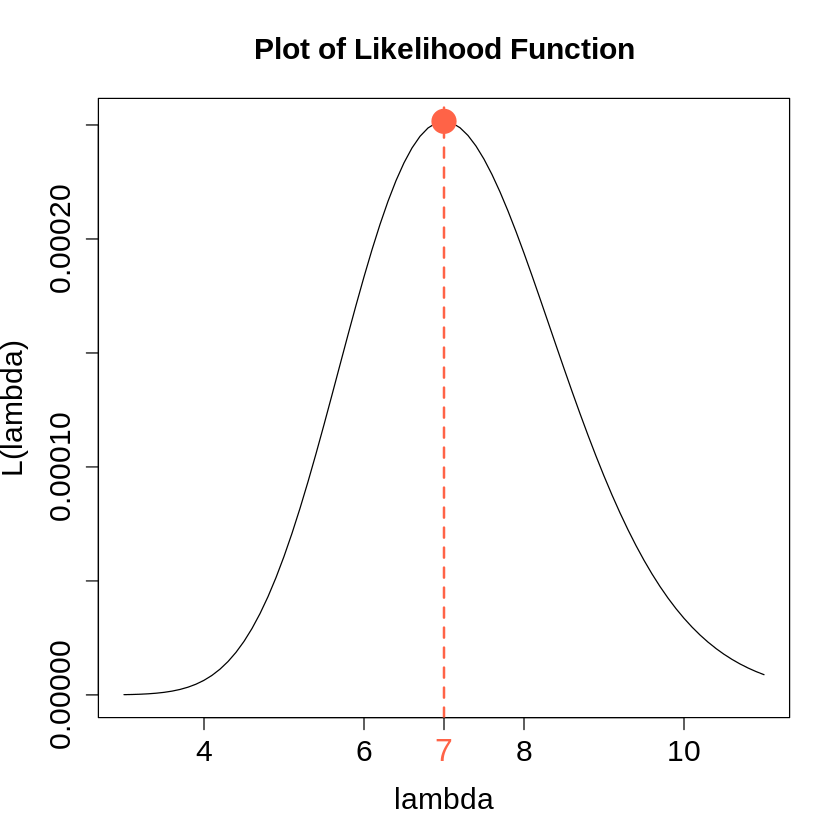

In [40]:
lam <- seq(3, 11, 0.1)  # values of lambda on x-axis
like.est <- lam^(sum(x)) * exp(-4*lam)/prod(factorial(x))  # values of L(lambda)

plot(lam, like.est,  # plot lam and likelihood on x and y axes
     type = "l",  # connect plotted points with a curve
     ylab = "L(lambda)",  # y-axis label
     xlab = "lambda",  # x-axis label
     main = "Plot of Likelihood Function",   # main label
     cex.lab=1.5, cex.axis=1.5, cex.main=1.5)   # size of font on labels
points(x = 7, y = 0.0002515952, cex = 4, pch = 20, col = "tomato")  # point at max

axis(1, at=c(7), col.axis = "tomato", cex.axis=1.6)  # marking MLE estimate
abline(v = 7, col = "tomato", lwd = 2, lty = 2)  # marking MLE estimate

## <a name="13reveal-lam">Revealing the Actual Value of $\lambda$</a>

---

We picked a value for $\lambda$ and stored it in `true.mean`. We have not revealed what the actual value of $\lambda$ is. Run the code cell below to see that actual value of $\lambda$, and compare your answer for $\hat{\lambda}_{\rm{MLE}}$ in [Question 3](#13q3) with the actual value of $\lambda$.

In [ ]:
true.mean

# <a name="13def-like">A Formula for the Likelihood Function</a>

---

Let $f(x; \theta)$ denote the pdf of a random variable $X$ with
associated parameter $\theta$. Suppose $X_1, X_2, \ldots , X_n$ are random samples from this distribution, and $x_1, x_2, \ldots , x_n$ are the corresponding observed values.

$$\color{dodgerblue}{\boxed{L(\theta \mid x_1, x_2, \ldots , x_n) = f(x_1; \theta) f(x_2; \theta) \ldots f(x_n; \theta) = \prod_{i=1}^n f(x_i; \theta).}}$$

<br>

### <font color="mediumseagreen">Important Note About Variables and Constants in $L(\theta)$</font>

---

<font color="mediumseagreen">*In the formula for the likelihood function, the values $x_1, x_2, \ldots x_n$ are fixed values, and the parameter $\theta$ is the variable in the likelihood function. We consider what happens to the value of the $L(\theta)$ when we vary the value of $\theta$. The MLE $\hat{\theta}_{\rm{MLE}}$ is the value of $\theta$ that gives the maximum value of $L(\theta)$.*</font>



# <a name="13like-r1">Defining the Likelihood Function in R</a>

---

In [Question 2](#13q2) we derived an expression for the likelihood function $L(\lambda)$ given the random sample of $n=4$ values we picked from $X \sim \mbox{Pois}( \lambda)$ and stored in the vector `x`. Recall Poisson distributions have pmf

$$f(x; \lambda) = \frac{\lambda^x e^{-\lambda}}{x!} \qquad \mbox{for } x = 0, 1, 2, \ldots .$$

If we pick a sample of $n=4$ values we denote $X_1 = x_1$, $X_2 = x_2$, $X_3 = x_3$, and $X_4 = x_4$, then the likelihood function is

$$L(\lambda) = L(\theta \mid x_1, x_2, \ldots , x_n) = \left( \frac{\lambda^{x_1} e^{-\lambda}}{x_1!} \right) \left( \frac{\lambda^{x_2} e^{-\lambda}}{x_2!} \right) \left( \frac{\lambda^{x_3} e^{-\lambda}}{x_3!} \right) \left( \frac{\lambda^{x_4} e^{-\lambda}}{x_4!} \right).$$

We will use the random sample generated by the code cell below. Note `x` is a vector consisting of values `x[1]` $=9$, `x[2]` $=8$, `x[3]` $=6$,
and `x[4]` $=5$.

In [42]:
set.seed(612)

x <- rpois(4, true.mean)
x

[1] 9 8 6 5

## <a name="13prod-r">Defining the Likelihood Function as Product</a>

---

In the code cell below, we input the likelihood function.

-   To define a symbolic function, we use the command<br>   `function(lam) [expr]`.  
 -   We use `lam` to denote our variable, $\lambda$.   
 -   We enter an appropriate formula in place of `[expr]`.
-   `[expr]` is the product of the $4$ pmf's of the Poisson distribution.
-   We name the newly created function `like`.
-   To evaluate the function `like` at $\lambda = 7$, we use the command  `like(7)`.

In [ ]:
# #| eval: true
like <- function(lam) lam^x[1] * exp(-lam)/factorial(x[1]) * 
  lam^x[2] * exp(-lam)/factorial(x[2]) *  
  lam^x[3] * exp(-lam)/factorial(x[3]) * 
  lam^x[4] * exp(-lam)/factorial(x[4])

like(7)

## <a name="13use-for-prod">Improving the Code for a Likelihood Function</a>

---

If we have a sample size $n=100$ instead of $n=4$, we would not want to code the likelihood as we did in the previous code cell. We can streamline the process using a for loop that utilizes the structure of likelihood functions:

-   Each term in the product uses the same formula for the pmf.
-   The likelihood function is a product of all the pmf’s.

In the slot machine example, we have $X \sim \mbox{Pois}(\lambda)$ and a
sample $x_1=9$, $x_2=8$ , $x_3=6$, and $x_4=5$. The vectors `x` and
`pmf` are therefore

$$ x = (9, 8, 6, 5) \quad \mbox{and} \quad \mbox{pmf} = \left( \frac{\lambda^{9} e^{-\lambda}}{9!} , \frac{\lambda^{8} e^{-\lambda}}{8!} , \frac{\lambda^{6} e^{-\lambda}}{6!} , \frac{\lambda^{5} e^{-\lambda}}{5!} \right).$$

The likelihood function `like` is the product of the entries in the vector `pmf`. We can substitute different values for the parameter $\lambda$ into the function `like` and compute different values of the likelihood function.

-   Run the code cell below to compute the likelihood that $\lambda = 7$ given the sample  `x`.

In [ ]:
like <- function(lam){ 
  pmf <- lam^x * exp(-lam)/factorial(x) 
  prod(pmf)
}

like(7)

### <a name="13r-dist">Using Built-In Distribution Functions</a>

---

For many common distributions, R has built in functions to compute the values of pmf’s for many discrete random variables and pdf’s for continuous random variables. For Poisson distributions, the function `dpois(x, lamb)` calculates the value of $f(x; \lambda) = \frac{\lambda^{x} e^{-\lambda}}{x!}$.

-   Therefore, we can use `dpois(x, lam)`  in place of the   expression `lam^x * exp(-lam)/factorial(x)`.
-   The code cell below makes use of the `dpois(x, lam)` function and   saves us the trouble of typing the formula out ourselves!
-   Run the code to evaluate the function at $\lambda = 7$ to make sure   the result is consistent with our previous functions.

In [ ]:
like <- function(lam){ 
  pmf <- dpois(x, lam) 
  prod(pmf)
}

like(7)

## <a name="13r-opt">Optimizing the Likelihood Function in R</a>

---

In [Question 3](#13q3) we used methods from calculus to find the value of
$\theta$ that maximizes the likelihood function $L(\theta)$. We can
check those results using the command
`optimize(function, interval, maximum = TRUE)`.

-   `function` is the name of the function where we stored the   likelihood function.
-   `interval` is the interval of parameter values over which we   maximize the likelihood function.   
  -   Using `c(0,100)` means we will find the maximum of 
   $L(\theta)$ over $0 < \lambda < 100$.   
  -   Based on the values in our sample, we can narrow the interval to save a little computing time.
-   `maximum = TRUE` option means `optimize()` will identify the maximum  of the function.   
  -   Note the default for `optimize()` is to find the minimum value.
-   Run the command below to calculate $\hat{\lambda}_{\rm{MLE}}$ for   the slot machine example.

In [ ]:
optimize(like, c(0,100), maximum = TRUE)

# <a name="13prop">A First Look at Properties of MLE’s</a>

---

The random sample $(9,8,6,5)$ picked from $X \sim \mbox{Pois}(\lambda)$ gave $\hat{\lambda}_{\rm{MLE}} = 7$. If we pick another random sample $n=4$ from the population $X \sim \mbox{Pois}(\lambda)$, how much will our estimate for $\hat{\lambda}_{\rm{MLE}}$ change? Some desirable properties for the
distribution of $\hat{\lambda}_{\rm{MLE}}$ values from different random samples would be:

-   We would like the estimates to be <font color="dodgerblue">**unbiased**</font>.  
  -   We would like, on average, $\hat{\lambda}_{\rm{MLE}}$ to equal the actual value of $\lambda$.   
  -   In other words, we would like $\color{dodgerblue}{E \left(\hat{\lambda}_{\rm{MLE}} \right)=\lambda}$.
-   Hopefully the values of $\hat{\lambda}_{\rm{MLE}}$ <font color="dodgerblue">**do not vary very**</font> much from sample to sample. 
  -   One way to measure this is to consider $\color{dodgerblue}{\mbox{Var} \left( \hat{\lambda}_{\rm{MLE}} \right)}$. 
  -   The smaller $\mbox{Var} \left( \hat{\lambda}_{\rm{MLE}} \right)$ the better. 
  -   The variance, $\mbox{Var} \left( \hat{\lambda}_{\rm{MLE}} \right)$, is called the <font color="dodgerblue">**efficiency**</font> of the $\hat{\lambda}_{\rm{MLE}}$
-   <font color="dodgerblue">**We hope the estimates make practical sense**</font>.



## <a name="13q4">Question 4</a>

---

If population $X \sim \mbox{Pois}(\lambda)$ is the number of jackpot payouts a randomly selected slot machine has in one week:

-   What is the practical interpretation of the value of $\lambda$?
-   If we pick a random sample of 4 slot machines and find $x_1=9$, $x_2=8$ , $x_3=6$, and $x_4=5$, explain why an estimate $\hat{\lambda}_{\rm{MLE}} = 7$ makes practical sense.

### <a name="13sol4">Solution to Question 4</a>

---

<br>  
<br>  
<br>



## <a name="13another">Picking Another Random Sample</a>

---

The random sample $(9,8,6,5)$ picked from
$X \sim \mbox{Pois}(\lambda)$ gave $\hat{\lambda}_{\rm{MLE}} = 7$. The actual value of $\lambda$ we revealed the `true.mean` we used was $\lambda = 8$. Below we simulate picking another random sample of $n=4$ values from the same population, $X \sim \mbox{Pois}(8)$. Then we will compute $\hat{\lambda}_{\rm{MLE}}$ for this sample and see if we can start to pick up on a pattern.

-   Run the code cell below to generate a new random sample stored in `new.x`.

In [45]:
set.seed(012)  # fixes randomization

new.x <- rpois(4, 8)  # pick another random sample n=4 from Pois(8)
new.x  # print results

[1]  4 11 13  6

The new sample is $x_1=4$, $x_2=11$ , $x_3=13$, and $x_4=6$.

-   Run the code cell to compute the value of $\hat{\lambda}_{\rm{MLE}}$   for this new sample.

In [46]:
# be sure to first run code cell above to create new.x
new.like <- function(lam){
  new.pmf <- dpois(new.x, lam)
  prod(new.pmf)
}

optimize(new.like, c(0,100), maximum = TRUE)

$maximum
[1] 8.500015

$objective
[1] 1.589466e-05

### <a name="13compare">Comparing Estimates</a>

---

Let’s compare the two random samples and their corresponding values for the MLE estimate.

|  <font size="3">Sample</font> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  | <font size="3">Value of MLE</font> |
|---------------------------------------|--------------|
| $\large{(9, 8, 6, 5)}$ | $\large{7}$          |
| $\large{ (4, 11, 13, 6)}$ | $\large{8.5}$        |

-   Neither gives the correct value for $\lambda$ which is actually 8.   
  -   One estimate is too small and the other is too large.
-   We hope if we average all such MLE estimates together, we get the   actual value $\lambda = 8$.
-   We have some sense of the variation, but generating many (10,000)   random samples and looking at the distribution of many more MLE   estimates will tell us more information about the variability.



## <a name="13dist-MLE">Analyzing a Distribution of MLE’s</a>

---

The for loop in the code cell below generates a distribution of MLE’s for $\lambda$ based on 10,000 random samples size $n=4$ picked from $X \sim \mbox{Pois}(8)$. Inside the for loop we:

-   Pick a random sample size $n=4$ stored in `temp.x`.
-   Calculate the MLE based on `temp.x` that we store in the vector `pois.mle`.

Then we plot a histogram to display `pois.mle`, the distribution of MLE’s from the 10,000 random samples each size $n=4$

-   Run the code cell below to generate and plot a distribution of MLE’s.

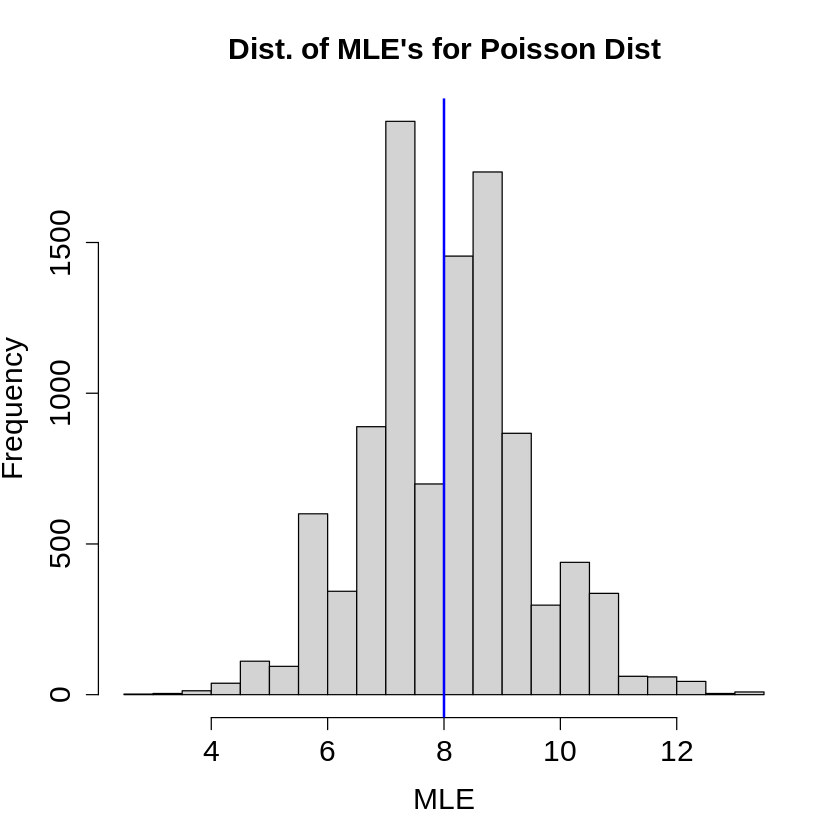

In [47]:
pois.mle <- numeric(10000)

for (i in 1:10000)
{
  temp.x <- rpois(4, 8)  # given random sample
  like.pois <- function(lam){  # define likelihood function
    pmf.pois <- dpois(temp.x, lam)  
    prod(pmf.pois)  
}
  pois.mle[i] <- optimize(like.pois, c(0,100), maximum = TRUE)$maximum  # find max of likelihood function
}

hist(pois.mle, 
     breaks = 20,
     xlab = "MLE",
     main = "Dist. of MLE's for Poisson Dist",
     cex.lab=1.5, cex.axis=1.5, cex.main=1.5)  # increase font size on labels
abline(v = 8, col = "blue", lwd = 2)  # plot at actual value of lambda

## <a name="13q5">Question 5</a>

---

Calculate the mean and variance of the distribution of MLE’s stored in `mle.pois` and interpret the results. How would you describe the shape of the distribution? What would you expect to happen to the distribution as $n$ gets larger?

### <a name="13sol5">Solution to Question 5</a>

---

In [ ]:
# use code cell to answer questions above



<br>  
<br>  
<br>



# <a name="13lprac-L">Practice: Finding Formulas for $L(\theta)$</a>

---



## <a name="13q6">Question 6</a>

---

A sample $(x_1, x_2, x_3, x_4) = (1,3,3,2)$ is randomly selected from $X \sim \mbox{Binom}(3,p)$. Give a formula the likelihood function. 

### <a name="13sol6">Solution to Question 6</a>

---

<br>  
<br>  
<br>



## <a name="13q7">Question 7</a>

---

Give a formula the likelihood function given the sample
$x_1, x_2, x_3, \ldots, x_n$ is randomly selected from
$X \sim \mbox{Exp}(\lambda)$.

### <a name="13sol7">Solution to Question 7</a>

---

<br>  
<br>  
<br>



# <a name="13prac-max">Practice: Maximizing the Likelihood Function</a>

---



## <a name="13q8">Question 8</a>

---

Using your answer from [Question 6](#13q6), find the MLE for $p$ when $(x_1, x_2, x_3, x_4) = (1,3,3,2)$ is randomly selected from $X \sim \mbox{Binom}(3,p)$.

### <a name="13sol">Solution to Question 8</a>

---

<br>  
<br>  
<br>



# <a name="13steps">Steps for Finding MLE</a>

---

Steps for finding MLE, $\hat{\theta}_{\rm MLE}$:

1.  Find a formula the likelihood function.

$$L(\theta \mid x_1, x_2, \ldots , x_n) = f(x_1; \theta) f(x_2; \theta) \ldots f(x_n; \theta) = \prod_{i=1}^n f(x_i; \theta)$$

2.  Maximize the likelihood function.
  - Take the derivative of $L$ with respect to $\theta$.
  - Find critical points of $L$ where $\frac{dL}{d\theta}=0$ (or is undefined).   
  - Evaluate $L$ at each critical point and identify the MLE.
3.  Check your work!



## <a name="13plot-Lq8">Plotting the Likelihood Function for Question 8</a>

---

Running the code cell below will generate a plot of the likelihood function from [Question 8](#13q8). We should verify the maximum of the graph coincides with our answer to [Question 8](#13q8). There is nothing to edit in
the code cell below.

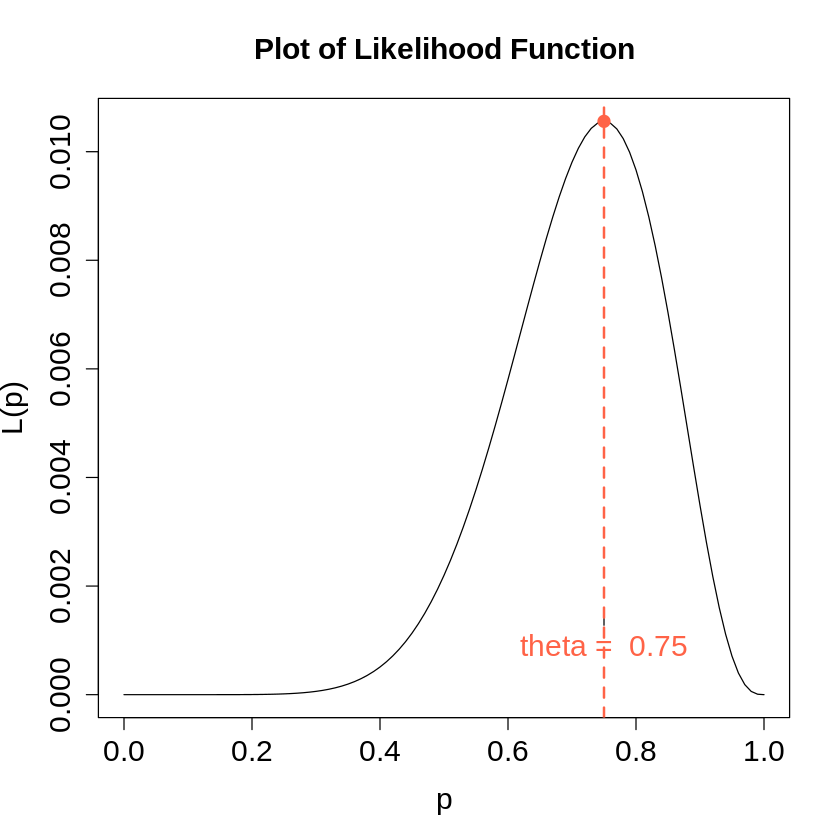

In [48]:
p <- seq(0, 1, 0.01)  # values of p on x-axis
like.binom <- 9 * p^9 * (1-p)^3  # values of L(p)
cv <- 9 * (0.75)^9 * (1-0.75)^3

plot(p, like.binom,  # plot p and likelihood on x and y axes
     type = "l",  # connect plotted points with a curve
     ylab = "L(p)",  # y-axis label
     xlab = "p",  # x-axis label
     main = "Plot of Likelihood Function",  # main label
     cex.lab=1.5, cex.axis=1.5, cex.main=1.5)  # increase font size on labels

points(x = 0.75, y = cv, cex = 2, pch = 20, col = "tomato")  # point at max

axis(1, at=c(0.75), label="theta =  0.75", col.axis = "tomato", pos=0.0015, cex.axis=1.5)  # marking MLE estimate
abline(v = 0.75, col = "tomato", lwd = 2, lty = 2)  # marking MLE estimate

## <a name="13q9">Question 9</a>

---

Recall the sample from [Question 6](#13q6). Complete the code cell below to build a formula for the likelihood function and find the value of $\hat{p}_{\rm{MLE}}$. Run the completed code cell to check your answer in [Question 8](#13q8).

<br>

-   <font color="mediumseagreen">*Hint: See earlier code for [constructing the likelihood   function](#13r-dist) and [finding the maximum](#13r-opt).*</font>
-   <font color="mediumseagreen">*Hint: When considering the interval option for `optimize()`, keep   in mind we are estimating the value of a proportion, $p$.*</font>

### <a name="13">Solution to Question 9</a>

---

Replace each of the four `??` in the code cell below with appropriate code. Then run the completed code to compute the MLE estimate $\hat{p}_{\rm{MLE}}$ for the sample `x` picked from
$X \sim \mbox{Binom}(3,p)$.

In [ ]:
x <- c(1, 3, 3, 2)  # given random sample

like.binom <- function(p){
  pmf.binom <- ??  # replace ??
  prod(??)  # replace ??
}

optimize(??, ??, maximum = TRUE)  # replace both ??

# <a name="13log-like">Using the Log-Likelihood Function</a>

---

Logarithmic functions such as $y = \ln{x}$ are increasing functions. The larger the input $x$, the larger the output $y = \ln{x}$ becomes. Thus, the value of $\theta$ that gives the maximum value of $L(\theta)$ will also correspond to the value of $\theta$ that gives the maximum value of the function $y = \ln{(L(\theta))}$, and vice versa:

> <font color="dodgerblue">The value of $\theta$ that maximizes functions $y=\ln{(L(\theta}))$ is the value of $\theta$ that maximizes $L(\theta)$.</font>

We call the the natural log of the likelihood function, $\color{dodgerblue}{y=\ln{(L(\theta}))}$, the <font color="dodgerblue">**log-likelihood function**</font>.

<br>

### <a name="13log-tip"><font color="mediumseagreen">Caution About Notation for Natural Log </font></a>

---

<font color="mediumseagreen">In statistics, the term “log” usually means “natural log”. The notation $\log{()}$ is often used to denote a natural log instead of using $\ln{()}$. This can be confusing since you may have previously learned $\log{()}$ implies “log base 10”. Similarly, in R:</font>

-   <font color="mediumseagreen">The function `log(x)` is the natural log of x.</font>
-   <font color="mediumseagreen">The function `log10(x)` is the log base 10 of x.</font>




## <a name="comp-loglike">Comapring Likelihood and Log-Likelihood Plots</a>

---

- There is nothing to edit in the code cell below.
- Run the code cell to compare maxium values of the likelihood function, $L(\theta)$, and the log-likelihood function, $\ln{(L(\theta))}$.


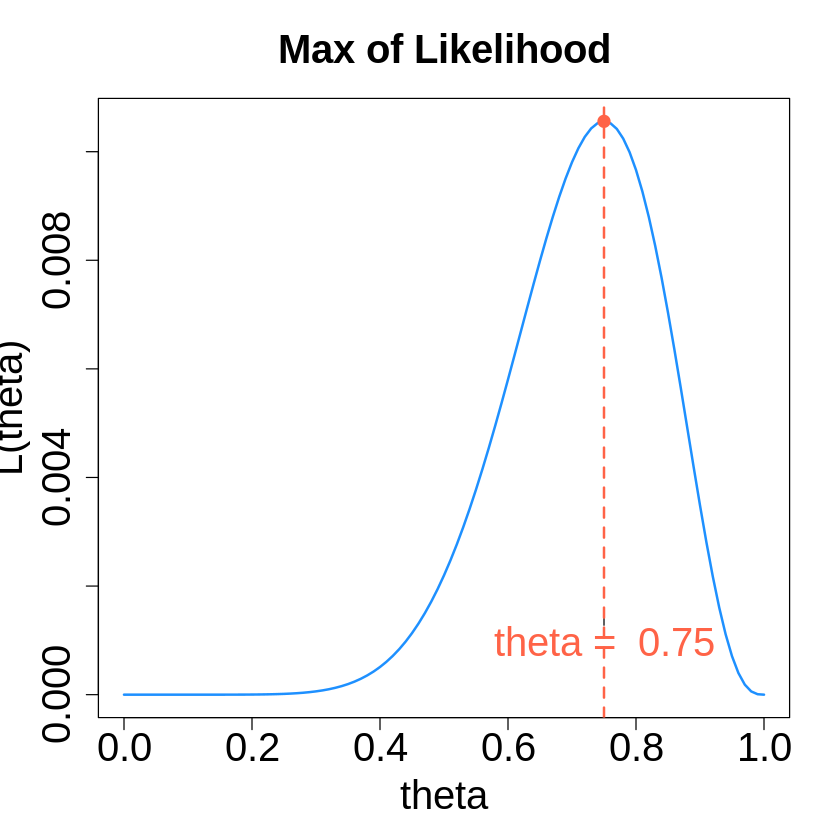

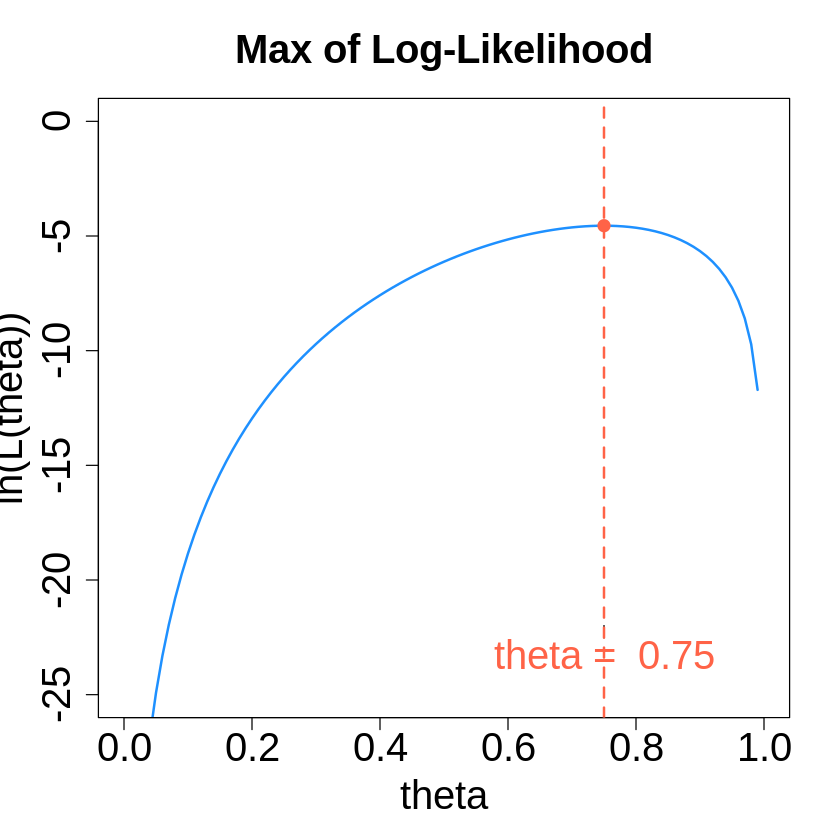

In [49]:
x <- seq(0, 1, 0.01)  # values of p on x-axis
y <- 9 * p^9 * (1-p)^3  # values of L(p)
cv <- 9 * (0.75)^9 * (1-0.75)^3

plot(x, y, 
     type="l", 
     lwd = 2, 
     col = "dodgerblue",
     xlab = "theta",
     ylab = "L(theta)",
     main = "Max of Likelihood",
     cex.lab=2, cex.axis=2, cex.main=2)
points(x = 0.75, y = cv, cex = 2, pch = 20, col = "tomato")  # point at max
axis(1, at=c(0.75), label="theta =  0.75", col.axis = "tomato", pos=0.0015, cex.axis=2)  # marking MLE estimate
abline(v = 0.75, col = "tomato", lwd = 2, lty = 2)  # marking MLE estimate

plot(x, log(y), 
     type="l", 
     lwd = 2, 
     col = "dodgerblue",
     xlab = "theta",
     ylab = "ln(L(theta))",
     ylim = c(-25,0),
     main = "Max of Log-Likelihood",
    cex.lab=2, cex.axis=2, cex.main=2)
points(x = 0.75, y = log(cv), cex = 2, pch = 20, col = "tomato")  # point at max
axis(1, at=c(0.75), label="theta =  0.75", col.axis = "tomato", pos=-22, cex.axis=2)  # marking MLE estimate
abline(v = 0.75, col = "tomato", lwd = 2, lty = 2)  # marking MLE estimate

## <a name="13why-ln">Why Maximize $y=\ln{(L(\theta}))$ Instead of $L(\theta)$?</a>

---

Consider the likelihood function from [Question 7](#13q7),

$$L({\color{tomato}\lambda}) = {\color{\tomato}\lambda}^n e^{- {\color{tomato}\lambda} \sum_i x_i}.$$
To find the critical values, we first need to find an expression for the derivative $\frac{d L}{d \lambda}$.

-   We need to apply the product rule.
-   We need to apply the chain rule to compute the derivative of   $e^{- {\color{tomato}\lambda} \sum_i x_i}$.
-   After finding an expression for the derivative, we would then need   to solve a complicated equation.
-   <font color="dodgerblue">**We can use key properties of the   natural log to help make the differentiation easier!**</font>



## <a name="13ln-prop">Useful Properties of the Natural Log</a>

---

The four properties of natural logs listed below will be helpful to recall when working with log-likelihood functions.

1.  $\ln{(A \cdot B)} = \ln{A} + \ln{B}$

2.  $\ln{\left( \frac{A}{B} \right)} = \ln{A} - \ln{B}$

3.  $\ln{(A^k)} = k \ln{A}$

4.  $\ln{e^k} = k$

Likelihood functions are by definition a product of functions and often involve $e$. Taking the natural log of the likelihood function converts a product to a sum. <font color="dodgerblue">**It is much easier to take the derivative of sums than products!**</font>



## <a name="13q10">Question 10</a>

---

Give a simplified expression for the log-likelihood function
corresponding to the likelihood function from the exponential
distribution in [Question 7](#13q7),

$$L({\color{tomato}\lambda}) = {\color{\tomato}\lambda}^n e^{- {\color{tomato}\lambda} \sum_i x_i}.$$

### <a name="13sol10">Solution to Question 10</a>

---

<br>  
<br>  
<br>



# <a name="13steps-log">Steps for Finding MLE Using a Log-Likelihood Function</a>

---

Steps for finding MLE, $\hat{\theta}_{\rm MLE}$, using a log-likelihood function:

1.  Find a formula the likelihood function.

$$L(\theta \mid x_1, x_2, \ldots , x_n) = f(x_1; \theta) f(x_2; \theta) \ldots f(x_n; \theta) = \prod_{i=1}^n f(x_i; \theta)$$
2. Apply the natural log to $L(\theta)$ to derive the log-likelihood
function $y = \ln{(L(\theta))}$. Simplify using [properties of the
natural log](#13ln-prop) before moving to the next step.

3.  Maximize the log-likelihood function.   
  -  Take the derivative of $y=\ln{(L(\theta))}$ with respect to       $\theta$   
  -  Find critical points of the log-likelihood function where       $\frac{dy}{d\theta}=0$ (or is undefined).   
  -  Evaluate the log-likelihood function $y=\ln{(L(\theta))}$ at       each critical point and identify the MLE.
4.  Check your work!



## <a name="13q11">Question 11</a>

---

Find a general formula for the MLE of $\lambda$ when
$x_1, x_2, x_3, \ldots, x_n$ comes from $X \sim \mbox{Exp}(\lambda)$. Your answer will depend on the $x_i$’s.

<br>

-   <font color="mediumseagreen">*Hint: Maximize the log-likelihood function from [Question 10](#13q10).*</font>
-   <font color="mediumseagreen">*Hint: Be sure you simplify the log-likelihood before taking the   derivative.*</font>
-   <font color="mediumseagreen">*Hint: Recall $\lambda$ is the variable when differentiating, and   treat each $x_i$ as a constant.*</font>

## <a name="13sol11">Solution to Question 11</a>

---

<br>  
<br>  
<br>



# <a name="13analytic">Analytic Results</a>

---

In [Question 11](#13q11), we found a formula for
$\hat{\lambda}_{\rm{MLE}}$, the MLE of exponential distributions in general. Given a sample, we can use the formula to compute the corresponding $\hat{\lambda}_{\rm{MLE}}$. We can test our formula on many different random samples and check to make sure our formula gives consistent answers with numeric solutions in R. Using calculus to derive the general formula for $\hat{\lambda}_{\rm{MLE}}$ in [Question 11](#13q11) is incredibly convenient since now we have a “shortcut” formula that we can use for finding MLE estimates for any random sample from an exponential distributions. 



## <a name="13q12">Question 12</a>

---

Find a general formula for the MLE of $\lambda$ when
$x_1, x_2, x_3, \ldots, x_n$ comes from $X \sim \mbox{Pois}(\lambda)$. Your answer will depend on the $x_i$’s.

### <a name="13sol12">Solution to Question 12</a>

---

<br>  
<br>  
<br>



## <a name="13q13">Question 13</a>

---

Suppose a random variable with $X_1=5$, $X_2=9$, $X_3=9$, and $X_4=10$ is drawn from a distribution with pdf

$$f(x; \theta) = \frac{\theta}{2\sqrt{x}}e^{-\theta \sqrt{x}}, \quad \mbox{where x $>0$}.$$

Find an MLE for $\theta$.

### <a name="13sol113">Solution to Question 13</a>

---

<br>  
<br>  
<br>



## <a name="13q14">Question 14</a>

---

Consider the random sample of $n=40$ values picked from a geometric
distribution $X \sim \mbox{Geom}(p)$ that are stored in the vector
`x.geom`. Note the proportion `true.p` is unknown for now.

-   Run the code cell below to generate a random value for `true.p`   (which is hidden) and create `x.geom` which is printed to the   screen.

In [ ]:
set.seed(117)  # fixes randomization of true.p and x.geom
true.p <- sample(seq(0.1, 0.9, 0.1), size=1)  # true.p hidden for now

x.geom <- rgeom(40, true.p)  # generate a random sample n=40  
x.geom

### <a name="13q14a">Question 14a</a>

---

Based on the sample stored in `x.geom` in the previous code cell, find the MLE estimate for $\hat{p}_{\rm{MLE}}$.

-   Complete and run the partially completed R code cell below.

#### <a name="13sol14a">Solution to Question 14a</a>

---

Replace each of the four `??` in the code cell below with appropriate code. Then run the completed code to compute the MLE estimate $\hat{p}_{\rm{MLE}}$ for the sample (size $n=40)$ `x.geom` randomly selected from $X \sim \mbox{Geom}(p)$.

In [ ]:
# be sure you first run code cell above to define x.geom
like.geom <- function(p){
  pmf.geom <- ??  # replace ??
  prod(??)  # replace ??
}


optimize(??, ??, maximum = TRUE)  # replace both ??

### <a name="13q14b">Question 14b</a>

---

Complete the partially completed code cell below to generate a plot of a distribution of MLE’s for $\hat{p}_{\rm{MLE}}$ based on 10,000 randomly selected samples from $X \sim \mbox{Geom}(p)$.

#### <a name="13sol14b">Solution to Question 14b</a>

---

Replace each of the five `??` in the code cell below with appropriate code. Then run the completed code to create and plot a distribution of MLE’s for samples size $n=40$ from $X \sim \mbox{Geom}(p)$.

In [ ]:
mle.geom <- numeric(10000)

for (i in 1:10000)
{
  x.temp <- ??  # replace ??, pick random sample size n=40
  geom.like <- function(p){
    geom.pmf <- ??  # replace ??
    prod(??)  # replace ??
}
  mle.geom[i] <- optimize(??, ??, maximum = TRUE)$maximum  # replace both ??
}

hist(mle.geom, 
     breaks = 20,
     xlab = "MLE",
     main = "Dist. of MLE's")
abline(v = true.p, col = "dodgerblue", lwd = 2)  # actual value of p
abline(v = true.p, col = "tomato", lwd = 2)  # expected value of MLE

### <a name="13q14c">Question 14c</a>

---

Based on the distribution of MLE’s in [Question 14b](#13q14b), do you believe the estimator $\hat{p}_{\rm{MLE}}$ is unbiased or biased? Explain why or why not.

### <a name="13sol14c">Solution to Question 14c</a>

---

<br>  
<br>  
<br>



# <a name="13summary-common">Summary of Results from Common Distributions</a>

---

So far we have observed:

-   **Poisson distributions:** $X \sim \mbox{Pois}(\lambda)$ have $\displaystyle \hat{\lambda}_{\rm MLE} = \bar{x}$

-   **Binomial distributions:** $X \sim \mbox{Binom}(n,p)$ have $\displaystyle \hat{p}_{\rm MLE} = \hat{p}$.

-   **Exponential distributions:** $X \sim \mbox{Exp}(\lambda)$ have $\displaystyle \hat{\lambda}_{\rm MLE} = \frac{1}{\bar{x}}$.

-   **Geometric distributions:** $X \sim \mbox{Geom}(p)$ have   $\displaystyle \hat{p}_{\rm MLE} = \frac{1}{\bar{x}}$.

For **normal distributions** $X \sim N(\mu, \sigma)$, the maximum
likelihood estimates of $\mu$ and $\theta$ are
$$\hat{\mu}_{\rm{MLE}} = \frac{1}{n} \sum_{i=1}^n x_i = \bar{x} \quad \mbox{ and } \quad \hat{\sigma}_{\rm{MLE}} = \sqrt{\frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2}.$$

-   See [this post](https://towardsdatascience.com/maximum-likelihood-estimation-explained-normal-distribution-6207b322e47f)  for a derivation of the MLE formulas for $\hat{\mu}_{\rm{MLE}}$ and $\hat{\sigma}_{\rm{MLE}}$.
-   [These materials from Penn State](https://online.stat.psu.edu/stat415/lesson/1/1.2) also explain how to derive the MLE formulas for $\hat{\mu}_{\rm{MLE}}$ and $\hat{\sigma}_{\rm{MLE}}$.



# <a name="13recap">Recap of Maximum Likelihood Estimates</a>

---

-   <font color="dodgerblue">**MLE’s give reasonable estimates   that make sense!**</font>
-   MLE’s are often good estimators since they satisfy several nice properties   
  -   <font color="dodgerblue">*Consistency*</font>: As we get  more data (sample size goes to infinity), the estimator becomes more and more accurate and converges to the actual value of $\theta$.   
  -   <font color="dodgerblue">*Normality*</font>: As we get   more data, the distribution of MLE’s converge to a normal    distribution.   
  -   <font color="dodgerblue">*Efficiency*</font>: They have   the smallest possible variance for a consistent estimator.
-   <font color="tomato">**The downside is finding MLE’s are not always easy (or possible).**</font>


# <a name="10CC License">Creative Commons License Information</a>
---


![Creative Commons
License](https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png)

*Statistical Methods: Exploring the Uncertain* by [Adam
Spiegler (University of Colorado Denver)](https://github.com/CU-Denver-MathStats-OER/Statistical-Theory) 
is licensed under a [Creative Commons
Attribution-NonCommercial-ShareAlike 4.0 International
License](http://creativecommons.org/licenses/by-nc-sa/4.0/). This work is funded by an [Institutional OER Grant from the Colorado Department of Higher Education (CDHE)](https://cdhe.colorado.gov/educators/administration/institutional-groups/open-educational-resources-in-colorado). 

For similar interactive OER materials in other courses funded by this project in the Department of Mathematical and Statistical Sciences at the University of Colorado Denver, visit <https://github.com/CU-Denver-MathStats-OER>.